## Manifold Learning on an S-curve

In [1]:
import pandas as pd
import seaborn as sns

from sklearn import datasets

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

### Load Data

In [2]:
def generate_s_curve(method, n = 1500):
    
    X, color = method( n_samples = n)
    
    print ("Shape of X : ", X.shape)
    print ("Shape of color : ", color.shape)
    print()
    print ("Sample X : \n")
    
    X = pd.DataFrame(X)
    print(X.sample(10))
    
    ax = plt.subplots(figsize=(12, 8))
    ax = plt.axes(projection ='3d')
    
    ax.scatter3D(X[0], X[1], X[2], c = color, cmap = plt.cm.RdYlBu, s=100);
    
    return X, color

Shape of X :  (1500, 3)
Shape of color :  (1500,)

Sample X : 

             0         1         2
112  -0.518224  1.430853 -1.855245
148  -0.999985  1.655928  1.005509
912  -0.991464  0.394829 -1.130380
952   0.811871  1.849512 -0.416163
1400 -0.096716  0.062192  1.995312
820   0.999100  0.279340 -1.042427
901   0.953216  1.973637 -0.697712
1124 -0.840037  0.267026  1.542530
960   0.998430  0.897727 -0.943995
1090  0.979233  1.246362 -0.797263


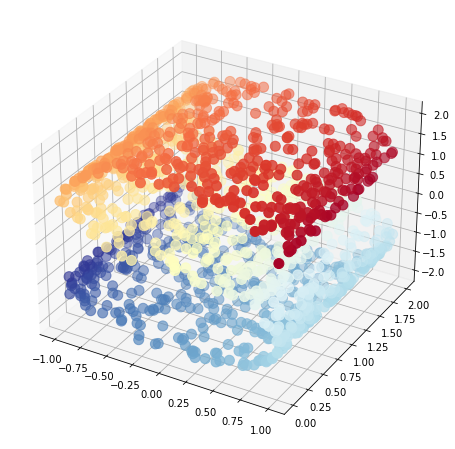

In [3]:
X, color = generate_s_curve(datasets.make_s_curve)

## Manifold Learning

In [4]:
def apply_manifold_learning(X, method):
    
    X = method.fit_transform(X)
    
    print ("New shape of X : ", X.shape)
    print()
    print ("Sample X : \n")
    
    X = pd.DataFrame(X)
    print(X.sample(10))
    
    plt.subplots(figsize = (12, 10))
    plt.axis('equal');

    plt.scatter(X[0], X[1], c = color, cmap = plt.cm.RdYlBu)
    plt.xlabel('X[0]')
    plt.ylabel('X[1]');
    
    return method

### Apply MDS
* n_components : Number of dimensions in which to immerse the dissimilarities.
* metric : If True, perform metric MDS; otherwise, perform nonmetric MDS.
* embedding_ :Stores the position of the dataset in the embedding space.
* stress_ : The final value of the stress (sum of squared distance of the disparities and the distances for all constrained points).

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html

New shape of X :  (1500, 2)

Sample X : 

             0         1
1179  0.284005  0.009539
361   0.012495 -0.341460
142  -0.323255 -0.127863
1422  0.608007 -0.156602
927  -0.051522  0.592725
1090  0.424447 -0.155718
175   0.314212  0.222712
259   0.123416 -0.397340
370  -0.061598  0.003189
1429 -0.592356  0.416137


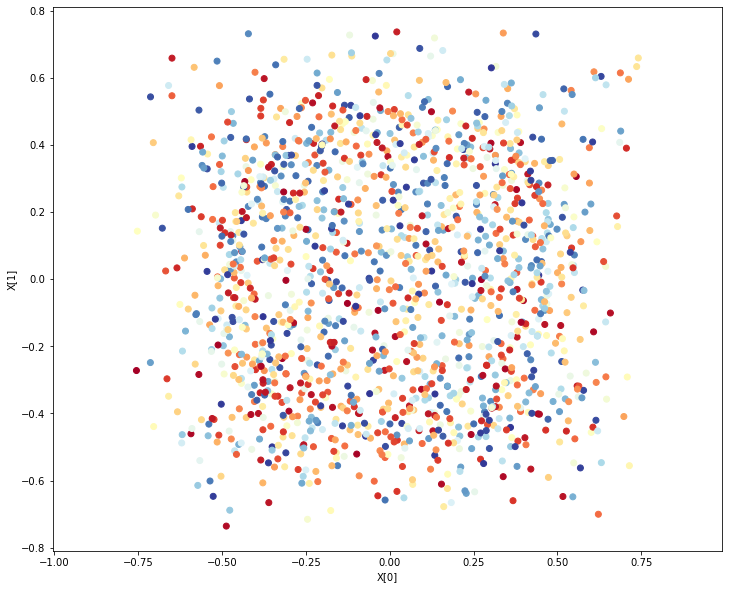

In [5]:
from sklearn.manifold import MDS

mds = apply_manifold_learning(X, MDS(n_components = 2, metric = False))

New shape of X :  (1500, 2)

Sample X : 

             0         1
847   0.248225 -0.928793
631  -0.155744 -1.382504
1368  1.396968 -0.532084
1337 -0.048061  0.910506
1466 -1.958603 -0.049492
799   0.235391  1.134271
239   0.301618  1.656366
434   1.172793  1.361555
1338 -0.157762  0.133556
1099  0.043766 -0.718461


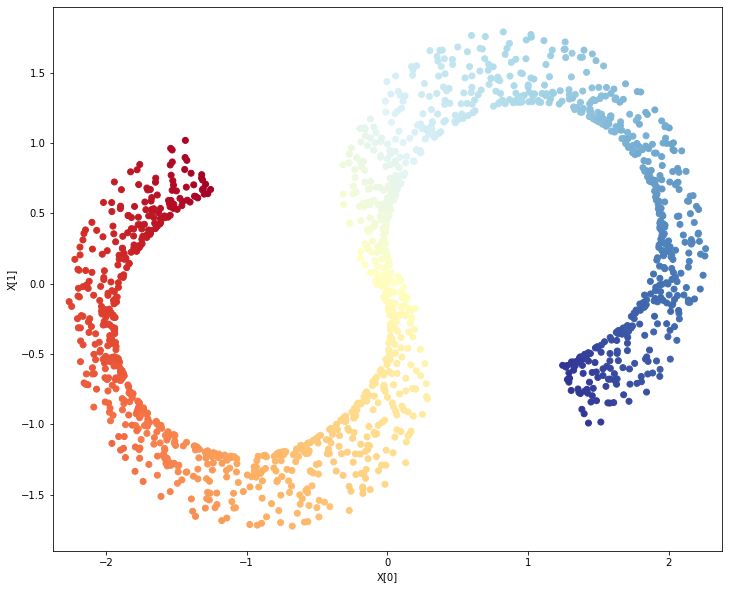

In [6]:
mds = apply_manifold_learning(X, MDS(n_components = 2, metric = True))

### Apply Spectral Embedding
* n_components : The dimension of the projected subspace. 
* random_state : A pseudo random number generator used for the initialization of the lobpcg eigenvectors.
* eigen_solver : None, ‘arpack’, ‘lobpcg’, or ‘amg’
    * The eigenvalue decomposition strategy to use.
    
* embedding_ : Spectral embedding of the training matrix.

* affinity_matrix_ : Affinity_matrix constructed from samples or precomputed.

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.SpectralEmbedding.html

New shape of X :  (1500, 2)

Sample X : 

             0         1
634   0.001517  0.001389
1113  0.001303  0.001745
932   0.002983 -0.002754
629  -0.002506 -0.001344
39    0.001538  0.001323
1342 -0.002336 -0.000766
650   0.000293  0.002893
952   0.000807  0.002499
1007  0.000591  0.002725
1250 -0.000548  0.002717


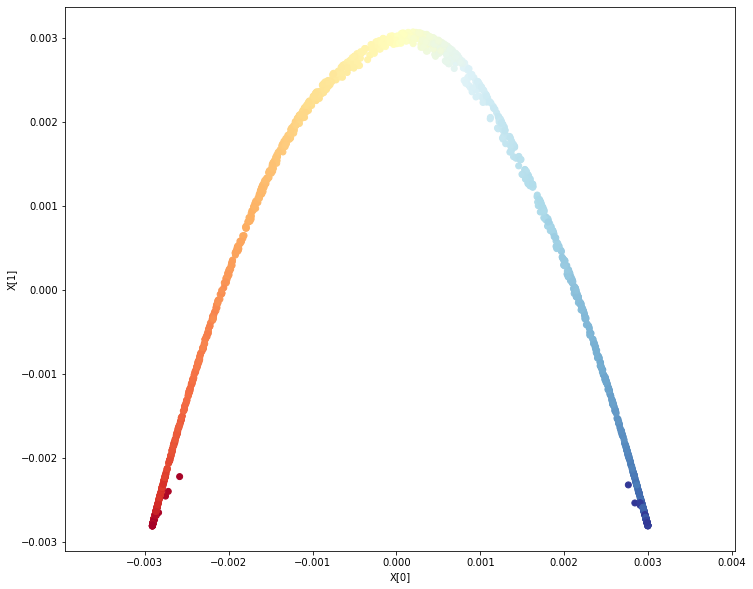

In [7]:
from sklearn.manifold import SpectralEmbedding

spectral_em = apply_manifold_learning(X, \
        SpectralEmbedding(n_components = 2, random_state = 0, eigen_solver = "arpack"))

### Apply TSNE
* n_components : Dimension of the embedded space.
* init : Initialization of embedding. Possible options are ‘random’, ‘pca’, and a numpy array of shape (n_samples, n_components). PCA initialization cannot be used with precomputed distances and is usually more globally stable than random initialization.
* random_state : If int, random_state is the seed used by the random number generator
* embedding_ : Stores the embedding vectors.
* kl_divergence_ : Kullback-Leibler divergence after optimization.

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

New shape of X :  (1500, 2)

Sample X : 

              0          1
294    7.149647   3.478982
1037  10.054300  -7.441759
482   52.612835 -14.083107
1479 -31.433956  -8.983349
889   60.572460 -29.842422
1243 -71.447411  11.610891
1111 -17.185148   0.990108
1105  37.410378  22.408272
133   45.943302 -13.617402
1237   9.028967  11.299228


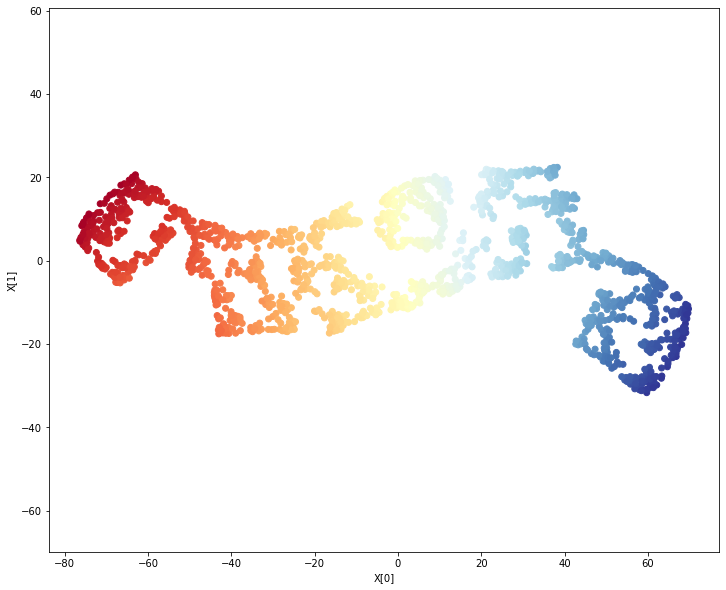

In [8]:
from sklearn.manifold import TSNE

tsne = apply_manifold_learning(X, TSNE(n_components = 2, init = 'pca', random_state = 0))

### Apply Isomap

* n_neighbors : number of neighbors to consider for each point.

* n_components : number of coordinates for the manifold
* embedding_ : Stores the embedding vectors.

* dist_matrix_ : Stores the geodesic distance matrix of training data.

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html

New shape of X :  (1500, 2)

Sample X : 

             0         1
1117 -2.403318  0.283665
692  -3.196887  0.035927
337   2.010929 -0.975076
55   -2.409975  0.511830
144  -4.353675  0.308248
1077 -3.882686  0.484775
283   1.120297 -0.598743
1439 -4.666997 -0.648598
1148  4.526752  0.300133
394  -0.018530 -0.135650


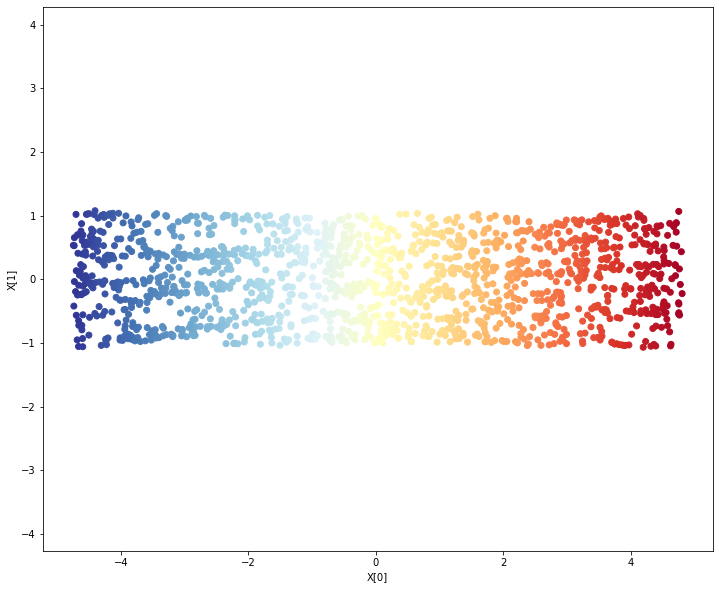

In [9]:
from sklearn.manifold import Isomap

isomap = apply_manifold_learning(X, Isomap(n_neighbors = 15, n_components = 2))

### Apply LLE
* n_neighbors :number of neighbors to consider for each point.

* n_components : number of coordinates for the manifold
* method : ‘standard’, ‘hessian’, ‘modified’ or ‘ltsa’
    * standard : use the standard locally linear embedding algorithm. 

    * hessian : use the Hessian eigenmap method. This method requires n_neighbors > n_components * (1 + (n_components + 1) / 2 

    * modified : use the modified locally linear embedding algorithm.
    * ltsa : use local tangent space alignment algorithm
* embedding_ : Stores the embedding vectors

* reconstruction_error_ : Reconstruction error associated with embedding_

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.LocallyLinearEmbedding.html

New shape of X :  (1500, 2)

Sample X : 

             0         1
341   0.012687  0.016912
380  -0.028719 -0.019337
392  -0.032479 -0.012448
1468  0.026955 -0.000236
1235  0.028884 -0.010864
261   0.009905  0.016894
1181 -0.013664  0.011725
817   0.028823 -0.010573
515   0.025494 -0.001366
1067  0.005360  0.035078


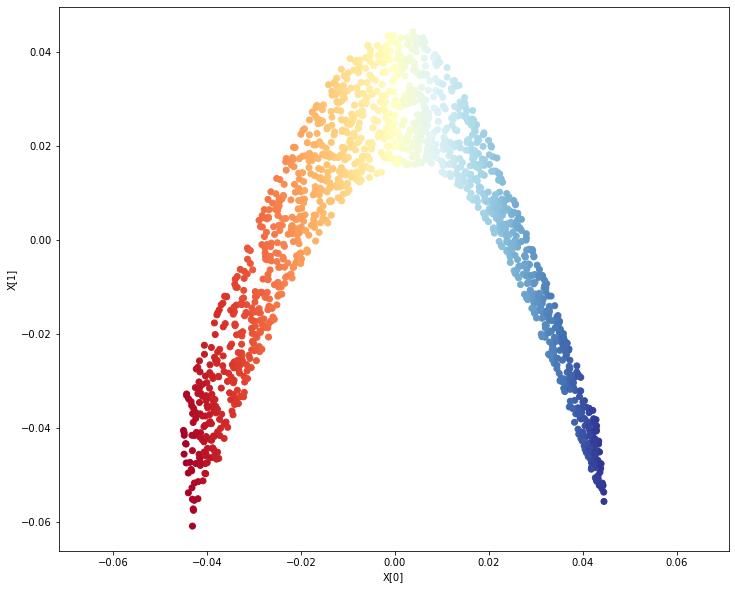

In [10]:
from sklearn.manifold import LocallyLinearEmbedding

lle = apply_manifold_learning(X, \
        LocallyLinearEmbedding(n_neighbors = 15, n_components = 2, method = 'standard') ) 

### Apply HLLE

* embedding_ : Stores the embedding vectors

* reconstruction_error_ : Reconstruction error associated with embedding_

New shape of X :  (1500, 2)

Sample X : 

             0         1
412  -0.019167  0.005178
670  -0.037784  0.001169
807   0.033805  0.024996
92   -0.036503  0.013818
126  -0.001952  0.026240
1175  0.021101 -0.015816
885   0.034390 -0.008991
54    0.029227 -0.020111
1398  0.001930 -0.025987
609   0.019360 -0.011439


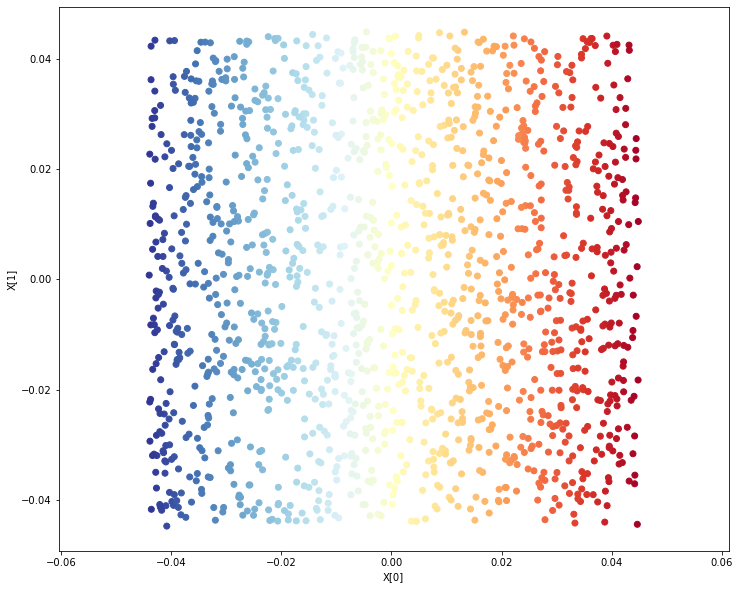

In [11]:
hlle = apply_manifold_learning(X, 
            LocallyLinearEmbedding(n_neighbors = 15, n_components = 2, method = 'hessian'))